# Esercizio 11.1

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

### aumento sigma e il numero di dati

In [3]:
import numpy as np

N_train = 10000
N_valid = 1000
sigma = 2.0
batch_sz =32
N_epoch = 30
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

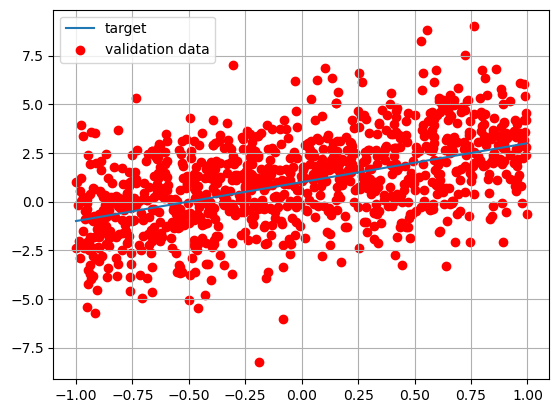

In [4]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [167]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=batch_sz, epochs=N_epoch,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
313/313 [==============================] - 1s 1ms/step - loss: 4.5340 - mse: 4.5340 - val_loss: 4.0490 - val_mse: 4.0490
Epoch 2/30
313/313 [==============================] - 0s 1ms/step - loss: 3.9509 - mse: 3.9509 - val_loss: 4.0020 - val_mse: 4.0020
Epoch 3/30
313/313 [==============================] - 0s 979us/step - loss: 3.9454 - mse: 3.9454 - val_loss: 4.0069 - val_mse: 4.0069
Epoch 4/30
313/313 [==============================] - 0s 989us/step - loss: 3.9457 - mse: 3.9457 - val_loss: 4.0058 - val_mse: 4.0058
Epoch 5/30
313/313 [==============================] - 0s 972us/step - loss: 3.9460 - mse: 3.9460 - val_loss: 4.0030 - val_mse: 4.0030
Epoch 6/30
313/313 [==============================] - 0s 971us/step - loss: 3.9453 - mse: 3.9453 - val_loss: 4.0078 - val_mse: 4.0078
Epoch 7/30
313/313 [==============================] - 0s 970us/step - loss: 3.9457 - mse: 3.9457 - val_loss: 4.0101 - val_mse: 4.0101
Epoch 8/30
313/313 [==============================] - 0s 1ms/step 

In [6]:
model.get_weights()

[array([[-0.02853835]], dtype=float32), array([0.], dtype=float32)]

In [7]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 1s 3ms/step - loss: 6.4727 - mse: 6.4727

Test loss: 6.472657680511475
Test accuracy: 6.472657680511475


In [8]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 2.2205 - mse: 2.2205

Test loss: 2.220459461212158
Test accuracy: 2.220459461212158


In [9]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

NameError: name 'history' is not defined

4/4 [==============================] - 0s 3ms/step


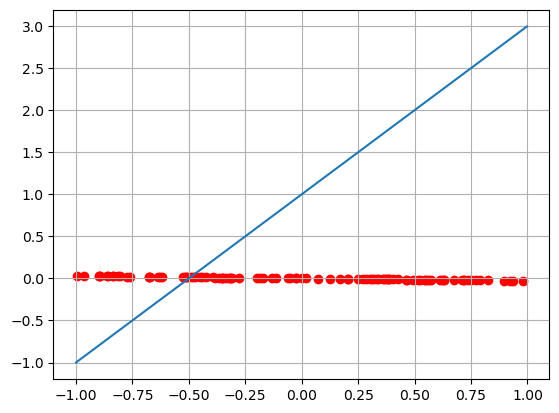

In [10]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### diminuisco sigma e le epoche

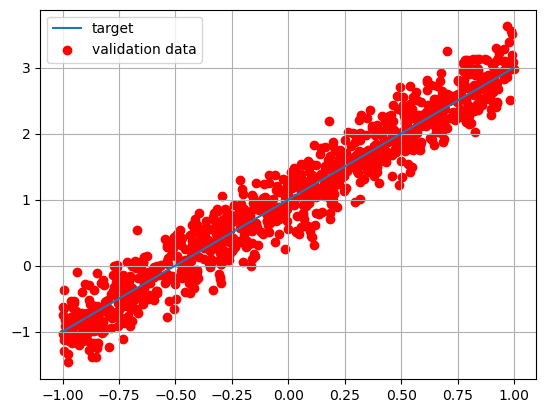

In [19]:
N_train = 1000
N_valid = 100
sigma = 0.3
batch_sz =100
N_epoch = 120

x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=batch_sz, epochs=N_epoch,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/120
10/10 [==============================] - 1s 44ms/step - loss: 3.0006 - mse: 3.0006 - val_loss: 2.5116 - val_mse: 2.5116
Epoch 2/120
10/10 [==============================] - 0s 8ms/step - loss: 2.4621 - mse: 2.4621 - val_loss: 2.0872 - val_mse: 2.0872
Epoch 3/120
10/10 [==============================] - 0s 8ms/step - loss: 2.0502 - mse: 2.0502 - val_loss: 1.7589 - val_mse: 1.7589
Epoch 4/120
10/10 [==============================] - 0s 9ms/step - loss: 1.7283 - mse: 1.7283 - val_loss: 1.5001 - val_mse: 1.5001
Epoch 5/120
10/10 [==============================] - 0s 10ms/step - loss: 1.4728 - mse: 1.4728 - val_loss: 1.2923 - val_mse: 1.2923
Epoch 6/120
10/10 [==============================] - 0s 10ms/step - loss: 1.2663 - mse: 1.2663 - val_loss: 1.1228 - val_mse: 1.1228
Epoch 7/120
10/10 [==============================] - 0s 10ms/step - loss: 1.0971 - mse: 1.0971 - val_loss: 0.9821 - val_mse: 0.9821
Epoch 8/120
10/10 [==============================] - 0s 10ms/step - loss: 0.956

Epoch 63/120
10/10 [==============================] - 0s 10ms/step - loss: 0.0854 - mse: 0.0854 - val_loss: 0.0764 - val_mse: 0.0764
Epoch 64/120
10/10 [==============================] - 0s 10ms/step - loss: 0.0853 - mse: 0.0853 - val_loss: 0.0762 - val_mse: 0.0762
Epoch 65/120
10/10 [==============================] - 0s 10ms/step - loss: 0.0853 - mse: 0.0853 - val_loss: 0.0760 - val_mse: 0.0760
Epoch 66/120
10/10 [==============================] - 0s 10ms/step - loss: 0.0852 - mse: 0.0852 - val_loss: 0.0759 - val_mse: 0.0759
Epoch 67/120
10/10 [==============================] - 0s 11ms/step - loss: 0.0852 - mse: 0.0852 - val_loss: 0.0757 - val_mse: 0.0757
Epoch 68/120
10/10 [==============================] - 0s 11ms/step - loss: 0.0851 - mse: 0.0851 - val_loss: 0.0756 - val_mse: 0.0756
Epoch 69/120
10/10 [==============================] - 0s 10ms/step - loss: 0.0851 - mse: 0.0851 - val_loss: 0.0755 - val_mse: 0.0755
Epoch 70/120
10/10 [==============================] - 0s 11ms/step - 

In [16]:
model.get_weights()

[array([[1.9939284]], dtype=float32), array([1.0034513], dtype=float32)]

In [17]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 8ms/step - loss: 0.0740 - mse: 0.0740

Test loss: 0.07400661706924438
Test accuracy: 0.07400661706924438


In [18]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 5ms/step - loss: 2.4048e-05 - mse: 2.4048e-05

Test loss: 2.404804399702698e-05
Test accuracy: 2.404804399702698e-05


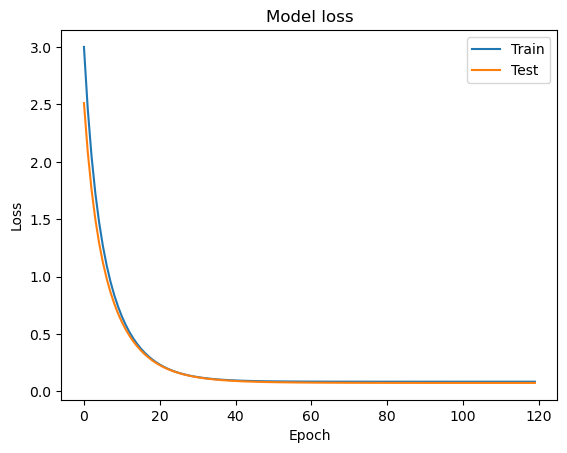

In [19]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 4ms/step


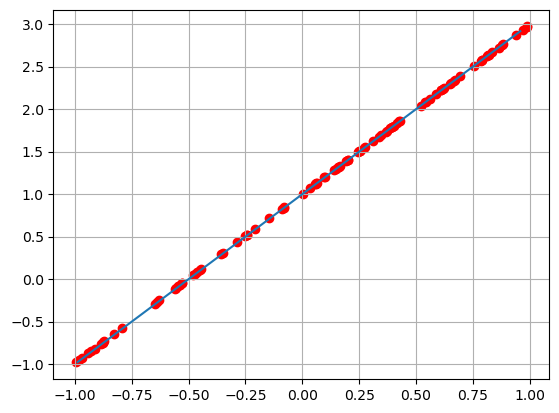

In [20]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()